In [3]:
!pip install cmake


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install face_recognition scikit-learn 

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached dlib-20.0.0.tar.gz (3.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
Failed to build dlib


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [48 lines of output]
  running bdist_wheel
  running build
  running build_ext
  Traceback (most recent call last):
    File "C:\Users\Franjo\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Franjo\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Franjo\AppData\Local\Programs\Python\Python310\Scripts\cmake.exe\__main__.py", line 4, in <module>
  ModuleNotFoundError: No module named 'cmake'
  
  
                     CMake is not installed on your system!
  
      Or it is possible some broken copy of cmake is installed on your system.
      It is unfortunately very common for python package managers to include
      broken copies of cmake.  So if the error above this refers to some file
      path to a cmake file inside a python or anaconda or m

In [34]:
import os, glob, json
import glob

import numpy as np
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

import face_recognition
from PIL import Image
import matplotlib.pyplot as plt

DATA_DIR = r"F:\projekt13\data_changed\train"
OUT_DIR = r"F:\projekt13"
os.makedirs(OUT_DIR, exist_ok=True)

In [33]:
# Build Gallery: extract embeddings & labels
def load_embeddings(root_dir):
    embs, labels = [], []
    for person in os.listdir(root_dir):
        pth = os.path.join(root_dir, person)
        if not os.path.isdir(pth): continue
        for img_f in glob.glob(os.path.join(pth, "*.[jJ][pP][gG]")):
            img = face_recognition.load_image_file(img_f)
            encs = face_recognition.face_encodings(img)
            if not encs:
                print(f"⚠️ no face in {img_f}")
                continue
            embs.append(encs[0])
            labels.append(person)
    return np.vstack(embs), np.array(labels)

# load train + validation
X_train, y_train = load_embeddings("F:\projekt13\data_changed/train")
X_val,   y_val   = load_embeddings("F:\projekt13\data_changed/val")
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape,   y_val.shape)



<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Franjo\AppData\Local\Temp\ipykernel_17948\3831393599.py:19: SyntaxWarning: invalid escape sequence '\p'
  X_train, y_train = load_embeddings("F:\projekt13\data_changed/train")
C:\Users\Franjo\AppData\Local\Temp\ipykernel_17948\3831393599.py:20: SyntaxWarning: invalid escape sequence '\p'
  X_val,   y_val   = load_embeddings("F:\projekt13\data_changed/val")


⚠️ no face in F:\projekt13\data_changed/train\ben_afflek\734b5a2075.jpg
⚠️ no face in F:\projekt13\data_changed/train\ben_afflek\httpcsvkmeuaeccjpg.jpg
⚠️ no face in F:\projekt13\data_changed/train\ben_afflek\httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
⚠️ no face in F:\projekt13\data_changed/train\elton_john\95d3ce049f.jpg
⚠️ no face in F:\projekt13\data_changed/train\elton_john\e5ff35d5d1.jpg
⚠️ no face in F:\projekt13\data_changed/train\elton_john\httpmediacacheecpinimgcomxffeffbcefjpg.jpg
⚠️ no face in F:\projekt13\data_changed/train\elton_john\httpmediapopsugarassetscomfilescbffewltonjpg.jpg
⚠️ no face in F:\projekt13\data_changed/train\elton_john\httpssmediacacheakpinimgcomxfcfcbaeaeddabbjpg.jpg
⚠️ no face in F:\projekt13\data_changed/train\elton_john\httpssmediacacheakpinimgcomxfecfecaefaadfebejpg.jpg
⚠️ no face in F:\projekt13\data_changed/train\elton_john\httpwwwdeadlinecomvimgnetwpcontentuploadseltonjpg.jpg
⚠️ no face in F:\projekt13\data_changed/train\elton_john\http

In [38]:
# Train & dump KNN
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
dump(knn, os.path.join(OUT_DIR, "knn_model.joblib"))

KNN Accuracy: 0.9722222222222222
                precision    recall  f1-score   support

    ben_afflek       1.00      1.00      1.00         8
    elton_john       1.00      0.80      0.89         5
jerry_seinfeld       1.00      1.00      1.00         8
       madonna       0.88      1.00      0.93         7
  mindy_kaling       1.00      1.00      1.00         8

      accuracy                           0.97        36
     macro avg       0.97      0.96      0.96        36
  weighted avg       0.98      0.97      0.97        36



['F:\\projekt13\\knn_model.joblib']

In [39]:
# Train & dump SVM
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
dump(svm, os.path.join(OUT_DIR, "svm_model.joblib"))

SVM Accuracy: 0.9722222222222222
                precision    recall  f1-score   support

    ben_afflek       1.00      1.00      1.00         8
    elton_john       1.00      0.80      0.89         5
jerry_seinfeld       1.00      1.00      1.00         8
       madonna       0.88      1.00      0.93         7
  mindy_kaling       1.00      1.00      1.00         8

      accuracy                           0.97        36
     macro avg       0.97      0.96      0.96        36
  weighted avg       0.98      0.97      0.97        36



['F:\\projekt13\\svm_model.joblib']

In [40]:
# Save class list
classes = sorted(set(y_train))
with open(os.path.join(OUT_DIR, "classes.json"), "w") as f:
    json.dump(classes, f)

In [44]:
MODEL_DIR    = r"F:\projekt13"
KNN_PATH     = os.path.join(MODEL_DIR, "knn_model.joblib")
SVM_PATH     = os.path.join(MODEL_DIR, "svm_model.joblib")
CLASSES_PATH = os.path.join(MODEL_DIR, "classes.json")

# Load classifiers and class‐name list
knn = load(KNN_PATH)
svm = load(SVM_PATH)
classes = json.load(open(CLASSES_PATH, "r")) 

# Recognition Function

def recognize(image_path, model):
    img  = face_recognition.load_image_file(image_path)
    encs = face_recognition.face_encodings(img)
    if not encs:
        return None, 0.0
    emb = encs[0].reshape(1, -1)

    clf = knn if model=="knn" else svm
    label      = clf.predict(emb)[0]
    confidence = clf.predict_proba(emb).max()
    return label, confidence

Enter path to a face image (e.g. F:\\projekt13\\person.jpg):  F:\projekt13\brave_aElaSBu4ut.png


KNN →  mindy_kaling  (100.0% confidence)
SVM →  mindy_kaling  (93.6% confidence)


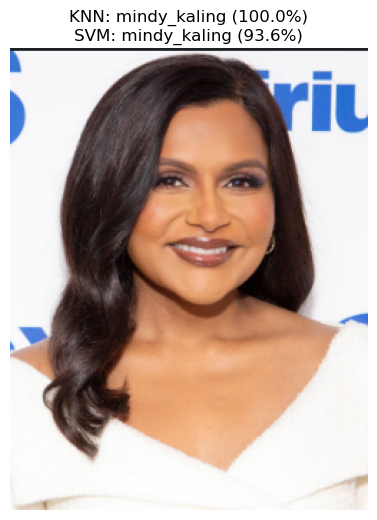

In [45]:
# %% [markdown]
# ## 3. Prompt & Run

# Prompt user for the path
img_path = input("Enter path to a face image (e.g. F:\\\\projekt13\\\\person.jpg): ").strip()

# Run both models
knn_label, knn_conf = recognize(img_path, "knn")
svm_label, svm_conf = recognize(img_path, "svm")

# Print results
print(f"KNN →  {knn_label}  ({knn_conf*100:.1f}% confidence)")
print(f"SVM →  {svm_label}  ({svm_conf*100:.1f}% confidence)")

# %% [markdown]
# ## 4. Display

# Load and show the image with both titles
img = Image.open(img_path)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.title(f"KNN: {knn_label} ({knn_conf*100:.1f}%)\n"
          f"SVM: {svm_label} ({svm_conf*100:.1f}%)", fontsize=12)
plt.show()